In [7]:
import pandas as pd
import numpy as np
import matplotlib
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
from os.path import exists
data_dir = 'data'
#data_dir = 'Documents/Users/kobo/514-assignment-1/data'
assert exists(f'{data_dir}/hk.csv'), 'data file is missing.'
hkdata = pd.read_csv(f'{data_dir}/hk.csv')
mydata = pd.read_csv(f'{data_dir}/my.csv')
mwdata = pd.read_csv(f'{data_dir}/mw.csv')

In [3]:
hkdata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,K,7,9,8,5,4,5,8,4,6,10,11,11,6,12,4,7
1469,K,5,9,5,4,2,7,7,3,6,9,8,9,6,11,3,7
1470,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
1471,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9


In [32]:
mydata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
1,M,6,9,8,6,9,7,8,6,5,7,5,8,8,9,8,6
2,M,7,11,11,8,9,3,8,4,5,10,11,10,10,9,5,7
3,M,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
4,M,4,5,7,4,4,6,6,3,4,9,9,10,7,5,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,Y,1,1,3,2,1,6,10,1,6,8,11,8,1,11,2,8
1574,Y,5,7,5,5,2,3,10,2,7,11,11,6,1,11,2,5
1575,Y,4,10,6,7,1,9,11,3,2,5,13,8,1,11,0,8
1576,Y,6,9,5,5,2,5,9,3,3,10,9,5,3,10,3,4


In [33]:
mwdata

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,W,12,14,12,8,5,9,10,4,3,5,10,7,10,12,2,6
1,W,5,9,6,7,8,7,9,5,3,7,9,8,6,8,3,8
2,W,3,4,4,3,2,9,10,3,2,5,9,7,6,11,0,8
3,W,4,8,5,6,3,6,8,4,1,7,8,8,8,9,0,8
4,W,2,1,3,1,1,7,8,4,0,7,8,8,6,10,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,M,5,10,6,8,4,7,7,12,2,7,9,8,9,6,0,8
1540,M,4,3,4,5,3,7,7,12,1,7,9,8,8,6,0,8
1541,M,5,8,7,6,7,8,6,6,5,7,7,10,11,6,2,9
1542,M,6,9,10,7,12,7,5,3,2,7,5,8,15,7,4,6


In [42]:
hk_encoding = {'H': 0, 'K': 1}

assert 'encoding' in globals(), 'Did you name your dictionary `encoding`?'
assert not (set(hk_encoding.keys()) - set(hkdata['class'].unique())), \
    'Double check that you have a mapping for each class'


# apply species encoding table to species column
hk_encoded = hkdata.copy() 
hk_encoded['class'] = hkdata['class'].replace(hk_encoding)


assert np.all(hk_encoded['class'].unique() == np.arange(2)), \
    'You should replace the values in data["class"]'

In [86]:
my_encoding = {'M': 0, 'Y': 1}

assert 'encoding' in globals(), 'Did you name your dictionary `encoding`?'
assert not (set(my_encoding.keys()) - set(mydata['class'].unique())), \
    'Double check that you have a mapping for each class'


# apply species encoding table to species column
my_encoded = mydata.copy() 
my_encoded['class'] = mydata['class'].replace(my_encoding)


assert np.all(my_encoded['class'].unique() == np.arange(2)), \
    'You should replace the values in data["class"]'

In [88]:
mw_encoding = {'M': 0, 'W': 1}

assert 'encoding' in globals(), 'Did you name your dictionary `encoding`?'
assert not (set(mw_encoding.keys()) - set(mwdata['class'].unique())), \
    'Double check that you have a mapping for each class'


# apply species encoding table to species column
mw_encoded = mwdata.copy() 
mw_encoded['class'] = mwdata['class'].replace(mw_encoding)

# assert np.all(mw_encoded['class'].unique() == np.arange(2)), \
#     'You should replace the values in data["class"]'

In [90]:
X_hk = hk_encoded.drop(['class'], axis=1)
Y_hk = hk_encoded.drop(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar' , 
                 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'], axis=1)
X_my = my_encoded.drop(['class'], axis=1)
Y_my = my_encoded.drop(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar' , 
                 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'], axis=1)
X_mw = mw_encoded.drop(['class'], axis=1)
Y_mw = mw_encoded.drop(['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar' , 
                 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx'], axis=1)

In [91]:
#Adding constant column of ones, mandatory for sm.OLS model
X_hk_1 = sm.add_constant(X_hk)
#Fitting sm.OLS model
hk_model = sm.OLS(Y_hk,X_hk).fit()

#Adding constant column of ones, mandatory for sm.OLS model
X_my_1 = sm.add_constant(X_my)
#Fitting sm.OLS model
my_model = sm.OLS(Y_my,X_my).fit()

#Adding constant column of ones, mandatory for sm.OLS model
X_mw_1 = sm.add_constant(X_mw)
#Fitting sm.OLS model
mw_model = sm.OLS(Y_mw,X_mw).fit()
print("hk values: ", hk_model.pvalues)
print("my values: ", my_model.pvalues)
print("mw values: ", mw_model.pvalues)


hk values:  x-box    5.150495e-02
y-box    1.553937e-03
width    1.067530e-01
high     4.089999e-04
onpix    1.871234e-14
x-bar    8.830391e-03
y-bar    8.772833e-01
x2bar    4.777297e-39
y2bar    4.356380e-01
xybar    6.833077e-03
x2ybr    1.023104e-03
xy2br    9.022476e-73
x-ege    3.667196e-04
xegvy    2.871612e-10
y-ege    1.998108e-01
yegvx    3.712571e-08
dtype: float64
my values:  x-box     6.257894e-04
y-box     1.451342e-01
width     1.673790e-08
high      7.158411e-24
onpix     5.455455e-03
x-bar     2.912230e-42
y-bar     1.786920e-06
x2bar     2.168403e-31
y2bar     3.113149e-06
xybar     1.558326e-14
x2ybr     5.616622e-41
xy2br     6.852418e-02
x-ege    7.858406e-103
xegvy     4.866899e-82
y-ege     1.076167e-26
yegvx     7.320817e-23
dtype: float64
mw values:  x-box    4.122970e-04
y-box    2.562685e-03
width    1.301334e-05
high     1.964785e-18
onpix    5.772016e-06
x-bar    4.538479e-01
y-bar    2.443380e-06
x2bar    2.087422e-93
y2bar    2.451992e-74
xybar    1.01965

In [61]:
#Backward Elimination
hk_cols = list(X_hk.columns)
hk_pmax = 1
while (len(hk_cols)>0):
    hk_p= []
    X_hk_1 = X_hk[hk_cols]
    X_hk_1 = sm.add_constant(X_hk_1)
    hk_model = sm.OLS(Y_hk,X_hk_1).fit()
    hk_p = pd.Series(hk_model.pvalues.values[1:],index = hk_cols)      
    hk_pmax = max(hk_p)
    hk_feature_with_p_max = hk_p.idxmax()
    if(hk_pmax>0.05):
        hk_cols.remove(hk_feature_with_p_max)
    else:
        break
hk_selected_features_BE = hk_cols

my_cols = list(X_my.columns)
my_pmax = 1
while (len(my_cols)>0):
    my_p= []
    X_my_1 = X_my[my_cols]
    X_my_1 = sm.add_constant(X_my_1)
    my_model = sm.OLS(Y_my,X_my_1).fit()
    my_p = pd.Series(my_model.pvalues.values[1:],index = my_cols)      
    my_pmax = max(my_p)
    my_feature_with_p_max = my_p.idxmax()
    if(my_pmax>0.05):
        my_cols.remove(my_feature_with_p_max)
    else:
        break
my_selected_features_BE = my_cols

mw_cols = list(X_mw.columns)
mw_pmax = 1
while (len(mw_cols)>0):
    mw_p= []
    X_mw_1 = X_mw[mw_cols]
    X_mw_1 = sm.add_constant(X_mw_1)
    mw_model = sm.OLS(Y_mw,X_mw_1).fit()
    mw_p = pd.Series(mw_model.pvalues.values[1:],index = mw_cols)      
    mw_pmax = max(mw_p)
    mw_feature_with_p_max = mw_p.idxmax()
    if(mw_pmax>0.05):
        mw_cols.remove(mw_feature_with_p_max)
    else:
        break
mw_selected_features_BE = mw_cols

print("hk selected values: ", hk_selected_features_BE)
print("my selected values: ", my_selected_features_BE)
print("mw selected values: ", mw_selected_features_BE)

hk selected values:  ['y-box', 'high', 'onpix', 'x-bar', 'x2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'yegvx']
my selected values:  ['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
mw selected values:  ['x-box', 'y-box', 'width', 'high', 'onpix', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'xegvy', 'y-ege', 'yegvx']


In [94]:
X_hk_dropped = hk_encoded.drop(['x-box', 'width', 'y-bar', 'y2bar', 'y-ege' ], axis=1)

X_my_dropped = my_encoded.drop(['xy2br'], axis=1)

X_mw_dropped = mw_encoded.drop(['x-bar', 'x-ege'], axis=1)
#X_hk_dropped, X_my_dropped, X_mw_dropped

In [95]:
hk_corr_matrix = X_hk_dropped.corr().abs()
hk_corr_matrix

,class,y-box,high,onpix,x-bar,x2bar,xybar,x2ybr,xy2br,x-ege,xegvy,yegvx
class,1.000000,0.071696,0.041068,0.062289,0.484837,0.384052,0.054150,0.081659,0.636681,0.057716,0.172398,0.300362
y-box,0.071696,1.000000,0.847732,0.626530,0.079539,0.113150,0.197240,0.011059,0.100828,0.466089,0.001745,0.055241
high,0.041068,0.847732,1.000000,0.698420,0.055090,0.014195,0.036078,0.035839,0.079972,0.380145,0.049379,0.023799
onpix,0.062289,0.626530,0.698420,1.000000,0.283575,0.383130,0.120080,0.058264,0.272802,0.544044,0.201222,0.115286
x-bar,0.484837,0.079539,0.055090,0.283575,1.000000,0.047193,0.113829,0.557868,0.818294,0.264272,0.015599,0.013943
x2bar,0.384052,0.113150,0.014195,0.383130,0.047193,1.000000,0.545350,0.077092,0.093339,0.273528,0.076798,0.133265
xybar,0.054150,0.197240,0.036078,0.120080,0.113829,0.545350,1.000000,0.189137,0.021907,0.017184,0.064289,0.369990
x2ybr,0.081659,0.011059,0.035839,0.058264,0.557868,0.077092,0.189137,1.000000,0.434915,0.125447,0.353632,0.523505
xy2br,0.636681,0.100828,0.079972,0.272802,0.818294,0.093339,0.021907,0.434915,1.000000,0.250561,0.015371,0.154256
x-ege,0.057716,0.466089,0.380145,0.544044,0.264272,0.273528,0.017184,0.125447,0.250561,1.000000,0.091843,0.021928


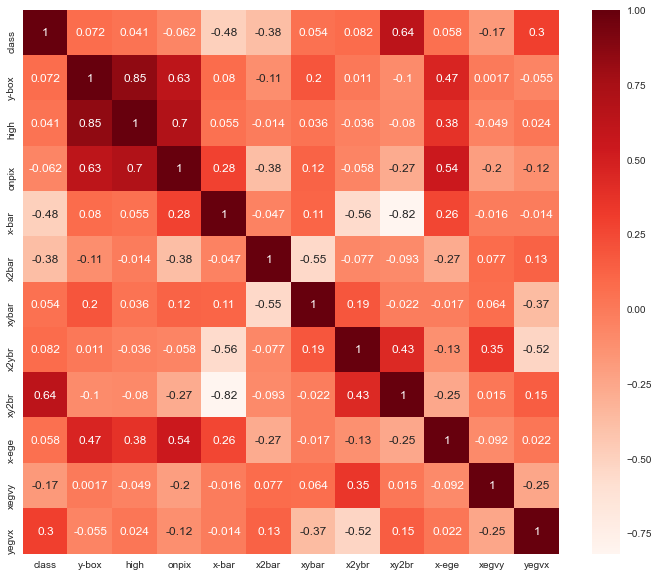

In [96]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
hk_cor = X_hk_dropped.corr()
sns.heatmap(hk_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

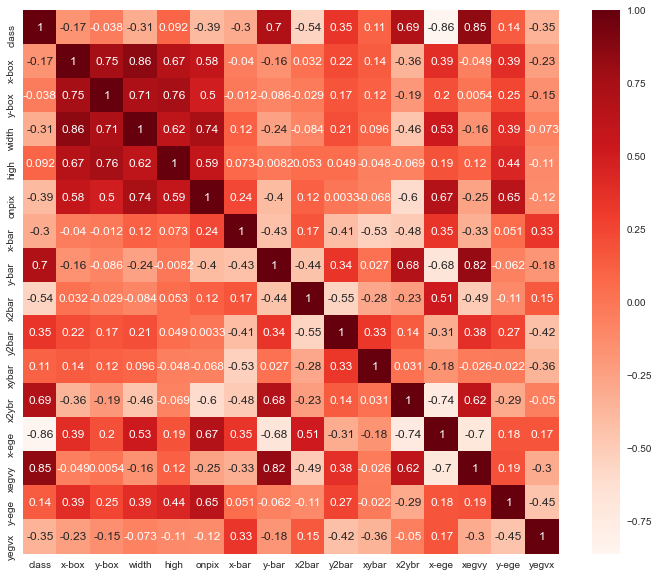

In [97]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
my_cor = X_my_dropped.corr()
sns.heatmap(my_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

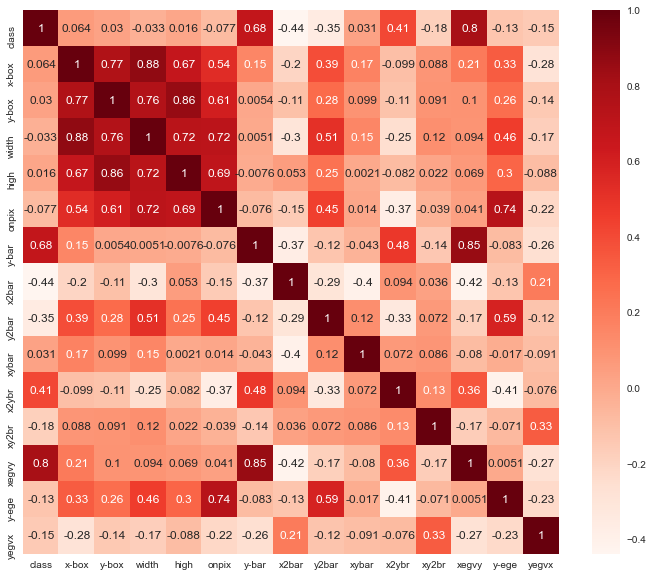

In [98]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
mw_cor = X_mw_dropped.corr()
sns.heatmap(mw_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [99]:
#Correlation with output variable
hk_cor_target = abs(hk_cor["class"])
#Selecting highly correlated features
hk_relevant_features = hk_cor[hk_cor>0.5]
hk_relevant_features

,class,y-box,high,onpix,x-bar,x2bar,xybar,x2ybr,xy2br,x-ege,xegvy,yegvx
class,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636681,NaN,NaN,NaN
y-box,NaN,1.000000,0.847732,0.626530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
high,NaN,0.847732,1.000000,0.698420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onpix,NaN,0.626530,0.698420,1.000000,NaN,NaN,NaN,NaN,NaN,0.544044,NaN,NaN
x-bar,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x2bar,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
xybar,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
x2ybr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
xy2br,0.636681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
x-ege,NaN,NaN,NaN,0.544044,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [100]:
#Correlation with output variable
my_cor_target = abs(my_cor["class"])
#Selecting highly correlated features
my_relevant_features = my_cor[my_cor>0.5]
my_relevant_features

,class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,x-ege,xegvy,y-ege,yegvx
class,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.702220,NaN,NaN,NaN,0.689680,NaN,0.846127,NaN,NaN
x-box,NaN,1.000000,0.753011,0.861182,0.670235,0.584520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y-box,NaN,0.753011,1.000000,0.713255,0.760858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,NaN,0.861182,0.713255,1.000000,0.616310,0.743198,NaN,NaN,NaN,NaN,NaN,NaN,0.526739,NaN,NaN,NaN
high,NaN,0.670235,0.760858,0.616310,1.000000,0.592004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onpix,NaN,0.584520,NaN,0.743198,0.592004,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.674134,NaN,0.648478,NaN
x-bar,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y-bar,0.702220,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.681364,NaN,0.824324,NaN,NaN
x2bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.513111,NaN,NaN,NaN
y2bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#Correlation with output variable
mw_cor_target = abs(mw_cor["class"])
#Selecting highly correlated features
mw_relevant_features = mw_cor[mw_cor>0.5]
mw_relevant_features

,class,x-box,y-box,width,high,onpix,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,xegvy,y-ege,yegvx
class,1.000000,NaN,NaN,NaN,NaN,NaN,0.680933,NaN,NaN,NaN,NaN,NaN,0.803934,NaN,NaN
x-box,NaN,1.000000,0.768894,0.878298,0.668894,0.538579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y-box,NaN,0.768894,1.000000,0.756105,0.863766,0.611650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,NaN,0.878298,0.756105,1.000000,0.720587,0.715920,NaN,NaN,0.513676,NaN,NaN,NaN,NaN,NaN,NaN
high,NaN,0.668894,0.863766,0.720587,1.000000,0.693775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onpix,NaN,0.538579,0.611650,0.715920,0.693775,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735572,NaN
y-bar,0.680933,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.854076,NaN,NaN
x2bar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y2bar,NaN,NaN,NaN,0.513676,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.587136,NaN
xybar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [123]:
X_hk_final4 = X_hk_dropped.drop(['x-bar', 'xybar', 'x2bar', 'x2ybr', 'x-ege', 'xegvy', 'yegvx' ], axis=1)
X_hk_final4
X_hk_final4.to_csv('X_hk_final4.csv')

In [124]:
X_my_final4 = X_my_dropped.drop(['x-bar', 'high', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'x-ege', 'xegvy', 'yegvx', 'y-ege' ], axis=1)
X_my_final4.to_csv('X_my_final4.csv')
X_my_final4

,class,x-box,y-box,width,onpix
0,0,11,15,13,7
1,0,6,9,8,9
2,0,7,11,11,9
3,0,6,9,9,6
4,0,4,5,7,4
...,...,...,...,...,...
1573,1,1,1,3,1
1574,1,5,7,5,2
1575,1,4,10,6,1
1576,1,6,9,5,2


In [125]:
X_mw_final4 = X_mw_dropped.drop(['high', 'y-bar', 'y2bar', 'xybar', 'x2bar', 'x2ybr', 'xy2br', 'y-ege', 'xegvy', 'yegvx' ], axis=1)
X_mw_final4.to_csv('X_mw_final4.csv')
X_mw_final4

,class,x-box,y-box,width,onpix
0,1,12,14,12,5
1,1,5,9,6,8
2,1,3,4,4,2
3,1,4,8,5,3
4,1,2,1,3,1
...,...,...,...,...,...
1539,0,5,10,6,4
1540,0,4,3,4,3
1541,0,5,8,7,7
1542,0,6,9,10,12


In [104]:
hk_array = X_hk_final4.values
X_hk = hk_array[:, 1:5]
Y_hk = hk_array[:, 0]
print('X_hk matrix dimensionality:', X_hk.shape)
print('Y_hk vector dimensionality:', Y_hk.shape)
my_array = X_my_final4.values
X_my = my_array[:, 1:5]
Y_my = my_array[:, 0]
print('X_my matrix dimensionality:', X_my.shape)
print('Y_my vector dimensionality:', Y_my.shape)
mw_array = X_mw_final4.values
X_mw = mw_array[:, 1:5]
Y_mw = mw_array[:, 0]
print('X_mw matrix dimensionality:', X_mw.shape)
print('Y_mw vector dimensionality:', Y_mw.shape)

X_hk matrix dimensionality: (1473, 4)
Y_hk vector dimensionality: (1473,)
X_my matrix dimensionality: (1578, 4)
Y_my vector dimensionality: (1578,)
X_mw matrix dimensionality: (1544, 4)
Y_mw vector dimensionality: (1544,)


In [105]:
X_hk_train, X_hk_test, Y_hk_train, Y_hk_test = model_selection.train_test_split(X_hk, Y_hk, test_size=0.10, random_state=10)
X_my_train, X_my_test, Y_my_train, Y_my_test = model_selection.train_test_split(X_my, Y_my, test_size=0.10, random_state=10)
X_mw_train, X_mw_test, Y_mw_train, Y_mw_test = model_selection.train_test_split(X_mw, Y_mw, test_size=0.10, random_state=10)

In [106]:
svc_hk = SVC(kernel='rbf', gamma='auto', C=6)
svc_my = SVC(kernel='rbf', gamma='auto', C=6)
svc_mw = SVC(kernel='rbf', gamma='auto', C=6)

cm_hk = ConfusionMatrix(svc_hk, classes="H,K".split(','))
cm_my = ConfusionMatrix(svc_my, classes="M,Y".split(','))
cm_mw = ConfusionMatrix(svc_mw, classes="M,W".split(','))

0.8108108108108109

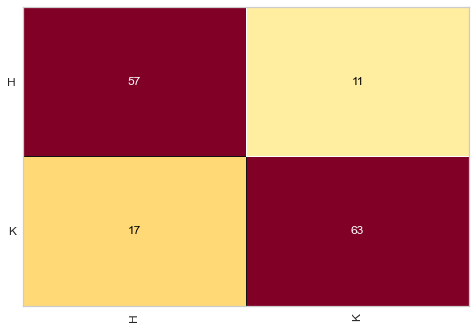

In [107]:
cm_hk.fit(X_hk_train, Y_hk_train)
cm_hk.score(X_hk_test, Y_hk_test)

0.9430379746835443

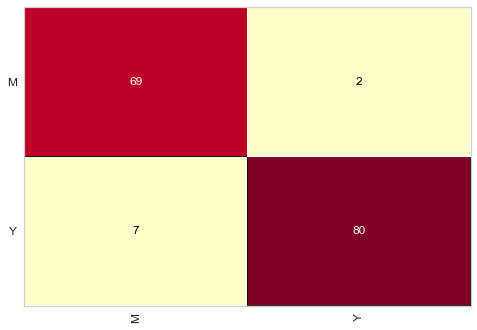

In [108]:
cm_my.fit(X_my_train, Y_my_train)
cm_my.score(X_my_test, Y_my_test)

0.7225806451612903

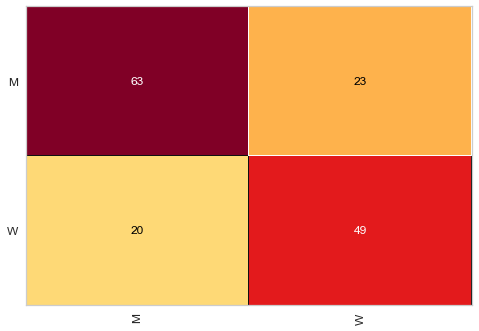

In [109]:
cm_mw.fit(X_mw_train, Y_mw_train)
cm_mw.score(X_mw_test, Y_mw_test)

In [110]:
# predict the responses for test dataset
hk_predictions = cm_hk.predict(X_hk_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_hk_test, hk_predictions))
# compute confusion matrix
print(confusion_matrix(Y_hk_test, hk_predictions))
# text report showing the main classification metrics
print(classification_report(Y_hk_test, hk_predictions, digits=5))
cm_hk.poof()

# predict the responses for test dataset
my_predictions = cm_my.predict(X_my_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_my_test, my_predictions))
# compute confusion matrix
print(confusion_matrix(Y_my_test, my_predictions))
# text report showing the main classification metrics
print(classification_report(Y_my_test, my_predictions, digits=5))
cm_my.poof()

# predict the responses for test dataset
mw_predictions = cm_mw.predict(X_mw_test)
# accuracy classification score
print("Accuracy: ", accuracy_score(Y_mw_test, mw_predictions))
# compute confusion matrix
print(confusion_matrix(Y_mw_test, mw_predictions))
# text report showing the main classification metrics
print(classification_report(Y_mw_test, mw_predictions, digits=5))
cm_mw.poof()

Accuracy:  0.8108108108108109
[[57 11]
 [17 63]]
              precision    recall  f1-score   support

           0    0.77027   0.83824   0.80282        68
           1    0.85135   0.78750   0.81818        80

    accuracy                        0.81081       148
   macro avg    0.81081   0.81287   0.81050       148
weighted avg    0.81410   0.81081   0.81112       148



<Figure size 576x396 with 0 Axes>

Accuracy:  0.9430379746835443
[[69  2]
 [ 7 80]]
              precision    recall  f1-score   support

           0    0.90789   0.97183   0.93878        71
           1    0.97561   0.91954   0.94675        87

    accuracy                        0.94304       158
   macro avg    0.94175   0.94569   0.94276       158
weighted avg    0.94518   0.94304   0.94316       158



<Figure size 576x396 with 0 Axes>

Accuracy:  0.7225806451612903
[[63 23]
 [20 49]]
              precision    recall  f1-score   support

           0    0.75904   0.73256   0.74556        86
           1    0.68056   0.71014   0.69504        69

    accuracy                        0.72258       155
   macro avg    0.71980   0.72135   0.72030       155
weighted avg    0.72410   0.72258   0.72307       155



<Figure size 576x396 with 0 Axes>

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
hk_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
my_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
mw_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
hk_grid.fit(X_hk_train, Y_hk_train)
my_grid.fit(X_my_train, Y_my_train)
mw_grid.fit(X_mw_train, Y_mw_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.808 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.823 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.823 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.815 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.823 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.834 total time=   0.2s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.2s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.845 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.849 total time=   0.1s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.1s
[CV 5/5] END ....C=1000, gam

[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.905 total time=   0.1s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.887 total time=   0.1s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.908 total time=   0.1s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.919 total time=   0.1s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.863 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.884 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ....C=100, gamm

[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.709 total time=   0.1s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.723 total time=   0.1s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.1s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.644 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.698 total time=   0.1s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.691 total time=   0.1s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.622 total time=   0.1s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.718 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.590 total time=   0.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.601 total time=   0.1s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.622 total time=   0.1s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.540 total time=   0.1s
[CV 5/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
# print best parameter after tuning
print(hk_grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(hk_grid.best_estimator_)

# # print best parameter after tuning
print(my_grid.best_params_)
# # print how our model looks after hyper-parameter tuning
print(my_grid.best_estimator_)

# # print best parameter after tuning
print(mw_grid.best_params_)
# # print how our model looks after hyper-parameter tuning
print(mw_grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [114]:
hk_grid_predictions = hk_grid.predict(X_hk_test)
print("H and K: ",classification_report(Y_hk_test, hk_grid_predictions))
my_grid_predictions = my_grid.predict(X_my_test)
print("M and Y: ", classification_report(Y_my_test, my_grid_predictions))
mw_grid_predictions = mw_grid.predict(X_mw_test)
print("M and W: ", classification_report(Y_mw_test, mw_grid_predictions))

H and K:                precision    recall  f1-score   support

           0       0.79      0.87      0.83        68
           1       0.88      0.80      0.84        80

    accuracy                           0.83       148
   macro avg       0.83      0.83      0.83       148
weighted avg       0.84      0.83      0.83       148

M and Y:                precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.96      0.93      0.95        87

    accuracy                           0.94       158
   macro avg       0.94      0.94      0.94       158
weighted avg       0.94      0.94      0.94       158

M and W:                precision    recall  f1-score   support

           0       0.74      0.71      0.73        86
           1       0.66      0.70      0.68        69

    accuracy                           0.70       155
   macro avg       0.70      0.70      0.70       155
weighted avg       0.71      0.70      0.70 

In [117]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [118]:
le=LabelEncoder()
Y_hk_test[:]=le.fit_transform(Y_hk_test[:])
Y_hk_test = Y_hk_test.astype(int)
hk_grid_predictions[:]=le.fit_transform(hk_grid_predictions[:])

Y_my_test[:]=le.fit_transform(Y_my_test[:])
Y_my_test = Y_my_test.astype(int)
my_grid_predictions[:]=le.fit_transform(my_grid_predictions[:])

Y_mw_test[:]=le.fit_transform(Y_mw_test[:])
Y_mw_test = Y_mw_test.astype(int)
mw_grid_predictions[:]=le.fit_transform(mw_grid_predictions[:])

In [119]:
hk_fpr, hk_tpr, hk_thresholds = roc_curve(Y_hk_test, hk_grid_predictions, pos_label=None)
my_fpr, my_tpr, my_thresholds = roc_curve(Y_my_test, my_grid_predictions, pos_label=None)
mw_fpr, mw_tpr, mw_thresholds = roc_curve(Y_mw_test, mw_grid_predictions, pos_label=None)

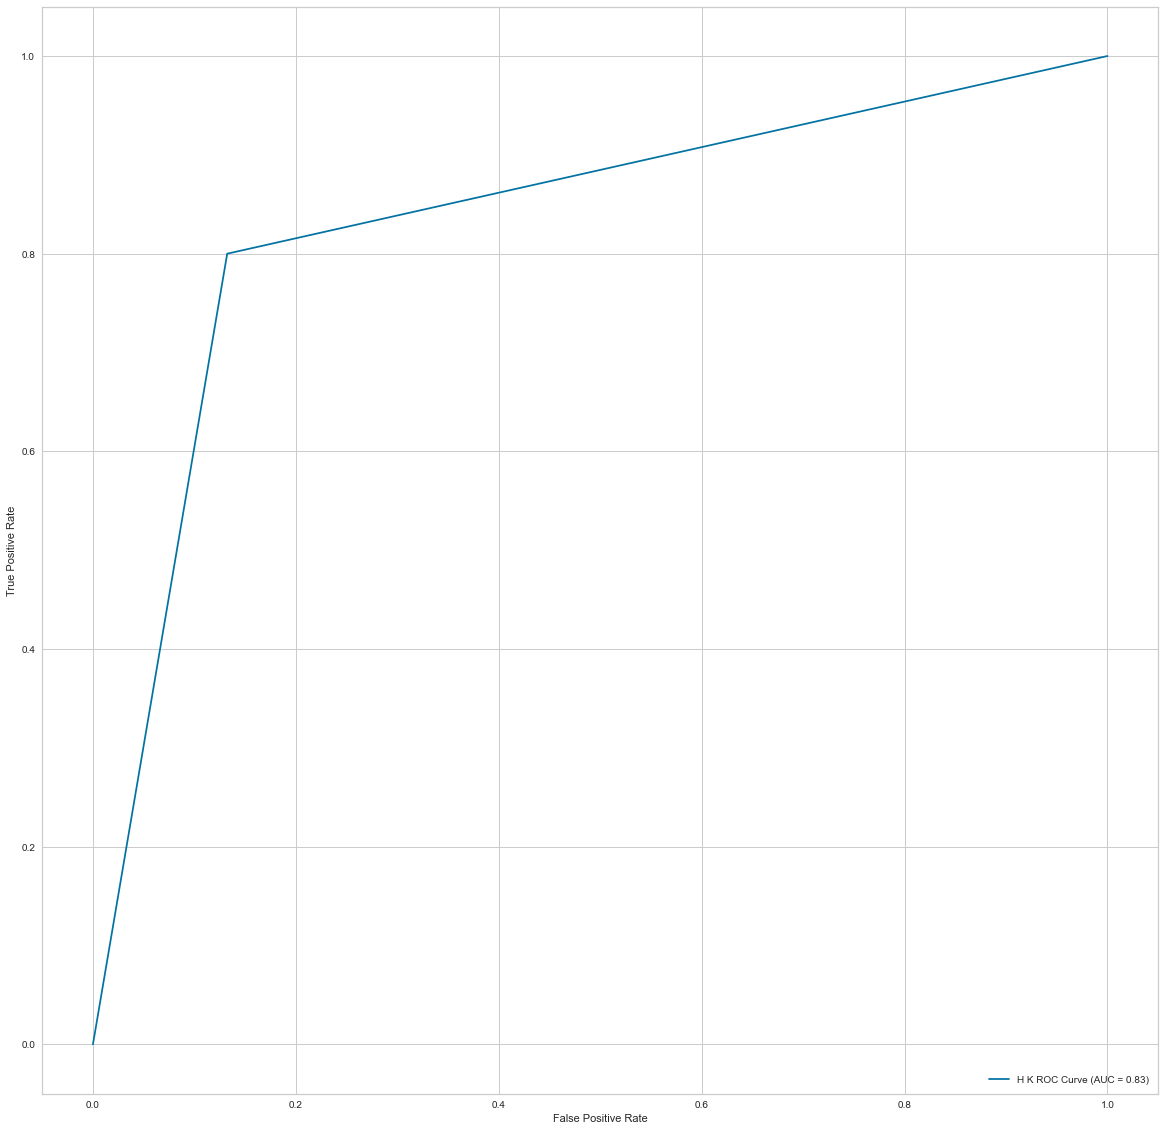

In [120]:
hk_roc_auc = metrics.auc(hk_fpr, hk_tpr)
hk_display = metrics.RocCurveDisplay(fpr=hk_fpr, tpr=hk_tpr, roc_auc=hk_roc_auc,
                                   estimator_name='H K ROC Curve')
hk_display.plot()
plt.show()

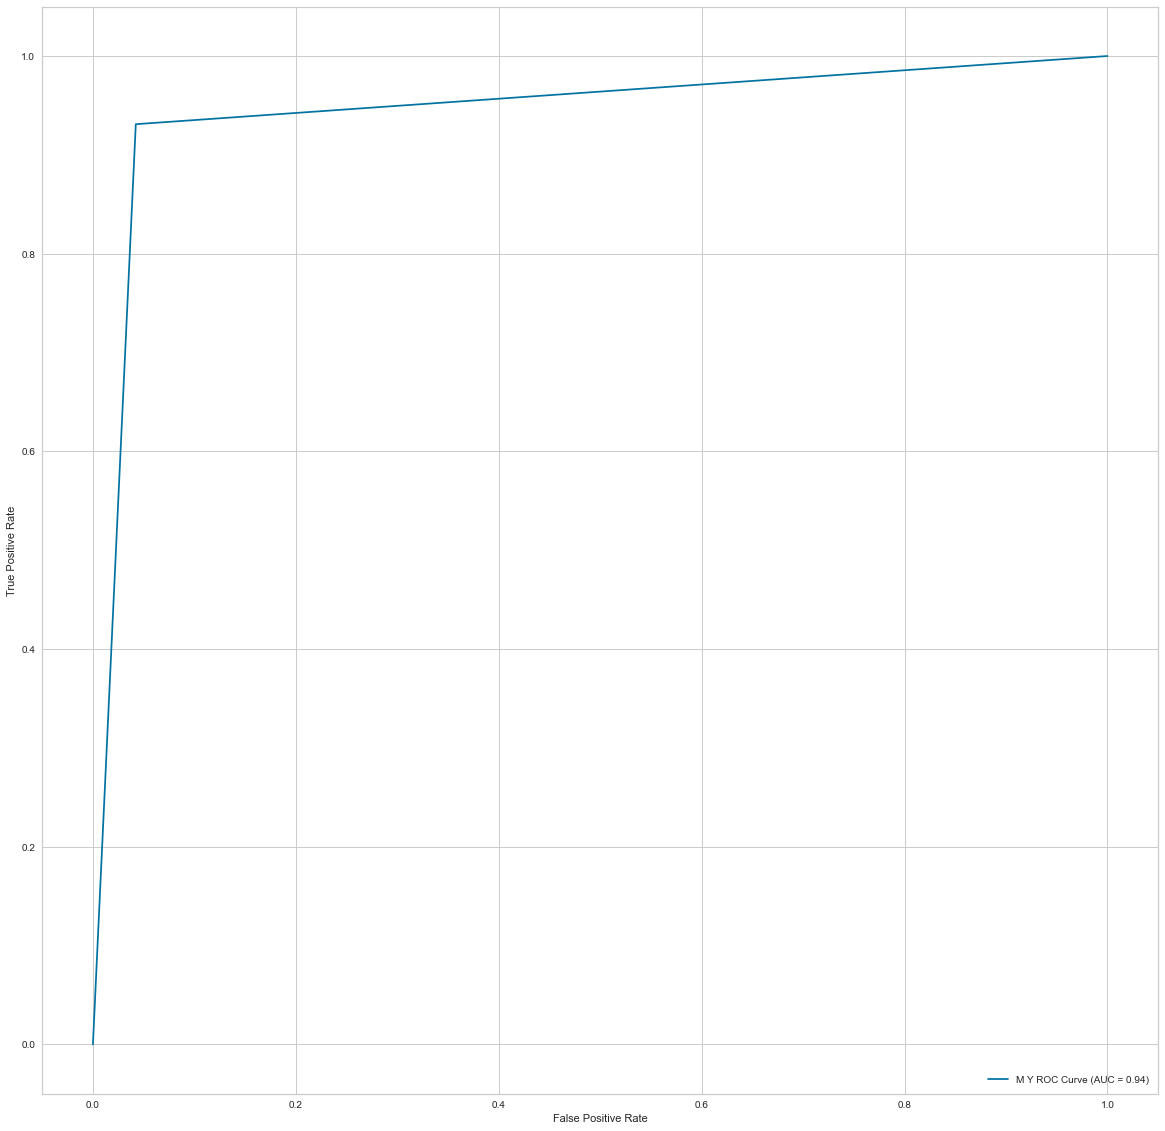

In [121]:
my_roc_auc = metrics.auc(my_fpr, my_tpr)
my_display = metrics.RocCurveDisplay(fpr=my_fpr, tpr=my_tpr, roc_auc=my_roc_auc,
                                   estimator_name='M Y ROC Curve')
my_display.plot()
plt.show()

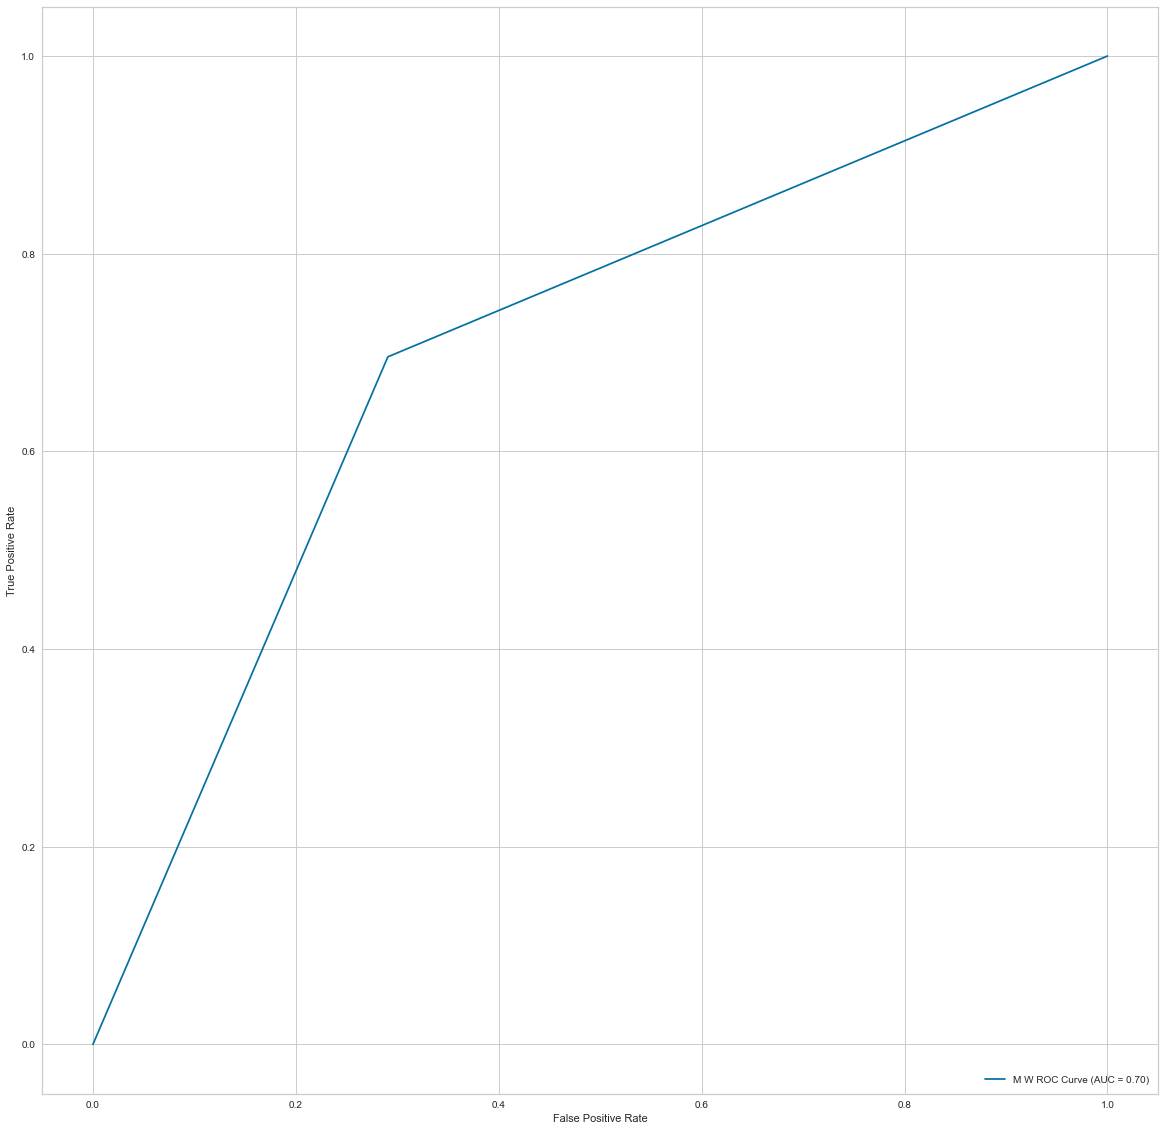

In [122]:
mw_roc_auc = metrics.auc(mw_fpr, mw_tpr)
mw_display = metrics.RocCurveDisplay(fpr=mw_fpr, tpr=mw_tpr, roc_auc=mw_roc_auc,
                                   estimator_name='M W ROC Curve')
mw_display.plot()
plt.show()